<a href="https://colab.research.google.com/github/Rishi500/CollaborativeFiltering/blob/master/facial%20emotion%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *

In [0]:
from fastai.vision import *


In [0]:
folder = 'surprise'

In [0]:
path = Path('data/emotion')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['angry','happy','neutral','sad','surprise']

In [16]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

angry


happy


neutral


sad


surprise


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         size=224, num_workers=4).normalize(imagenet_stats)

In [39]:
data.classes

['angry', 'happy', 'neutral', 'sad', 'surprise']

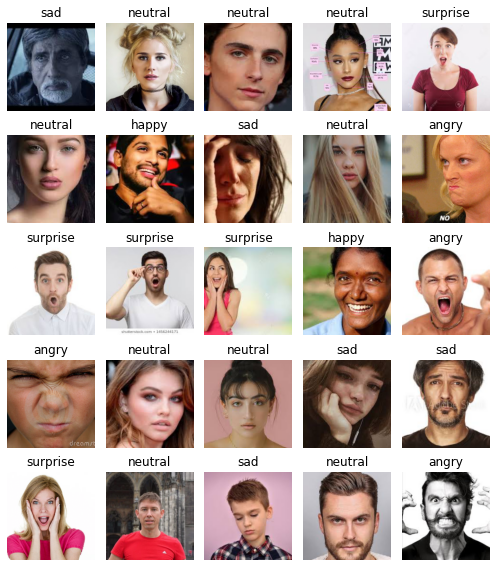

In [40]:
data.show_batch(rows=5, figsize=(7,8))

In [41]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['angry', 'happy', 'neutral', 'sad', 'surprise'], 5, 320, 80)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [43]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.963295,1.959450,0.750000,00:03
1,2.168589,1.478133,0.575000,00:03
2,1.664003,1.327940,0.487500,00:03
3,1.335729,1.237195,0.487500,00:03
4,1.091830,1.239793,0.525000,00:03


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


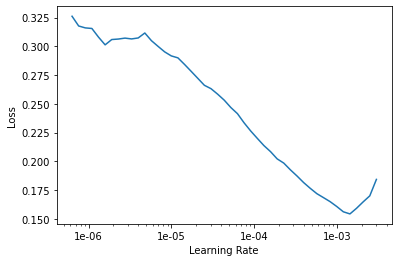

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(5, max_lr=slice(3e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.457920,1.547500,0.450000,00:04
1,0.384716,1.944211,0.462500,00:03
2,0.339695,1.519652,0.425000,00:03
3,0.291029,1.741489,0.437500,00:03
4,0.237950,1.490951,0.375000,00:03


In [0]:
learn.save('stage-2')

In [52]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happy,happy,happy,happy,happy
Path: data/emotion;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
surprise,sad,happy,surprise,angry
Path: data/emotion;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [53]:
interp = ClassificationInterpretation.from_learner(learn)

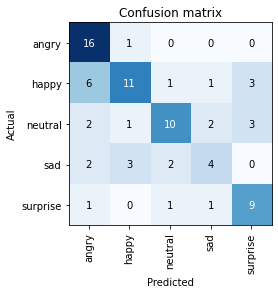

In [54]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [0]:
path = Path('data/emotion')
folder = 'test'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
img1 = open_image(path/'test'/'angry1.jpg')
img2 = open_image(path/'test'/'cry1.jpg')
img3 = open_image(path/'test'/'happy1.jpg')
img4 = open_image(path/'test'/'happy2.jpg')
img5 = open_image(path/'test'/'neutral1.jpg')
img6 = open_image(path/'test'/'surprise1.jpg')

In [60]:
data2 = ImageDataBunch.single_from_classes(path, data.classes, size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34)
learn.load('stage-2')

Exception ignored in: <bound method _ConnectionBase.__del__ of <multiprocessing.connection.Connection object at 0x7f45dc3aeb70>>
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 132, in __del__
    self._close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/emotion;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/emotion;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1)

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


In [0]:
torch.set_printoptions(sci_mode=False)

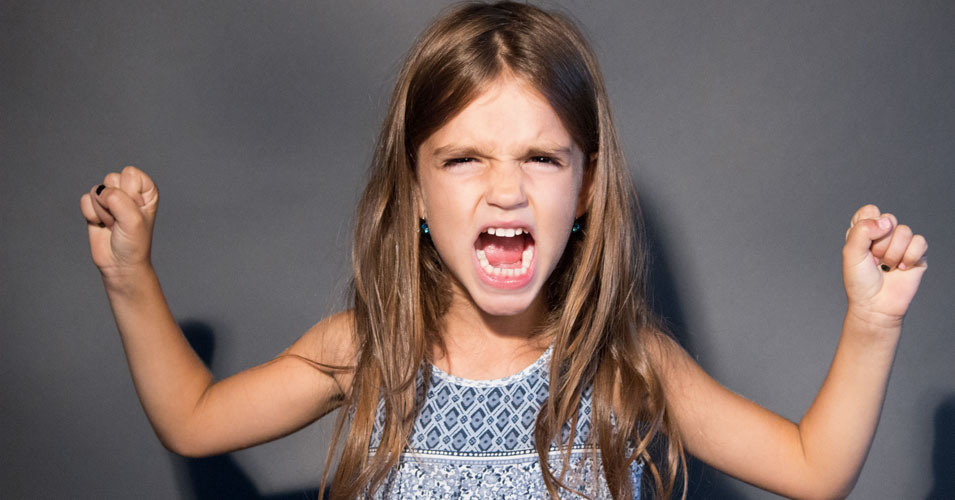

In [61]:
img1

In [80]:

pred_class,pred_idx,outputs = learn.predict(img1)
print(outputs)
print(data.classes)

tensor([    0.9963,     0.0000,     0.0000,     0.0000,     0.0037])
['angry', 'happy', 'neutral', 'sad', 'surprise']


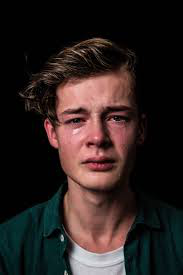

In [63]:
img2

In [64]:

pred_class,pred_idx,outputs = learn.predict(img2)


Category sad

In [83]:
pred_class,pred_idx,outputs = learn.predict(img2)
print(outputs)
print(data.classes)

tensor([    0.0001,     0.0024,     0.0000,     0.9975,     0.0000])
['angry', 'happy', 'neutral', 'sad', 'surprise']


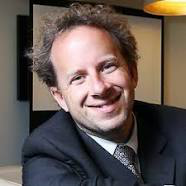

In [65]:
img3

In [84]:

pred_class,pred_idx,outputs = learn.predict(img3)
print(outputs)
print(data.classes)

tensor([0.8461, 0.0947, 0.0174, 0.0410, 0.0009])
['angry', 'happy', 'neutral', 'sad', 'surprise']


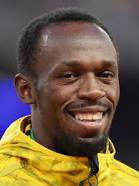

In [67]:
img4

In [85]:

pred_class,pred_idx,outputs = learn.predict(img4)
print(outputs)
print(data.classes)

tensor([0.6554, 0.2190, 0.0953, 0.0295, 0.0008])
['angry', 'happy', 'neutral', 'sad', 'surprise']


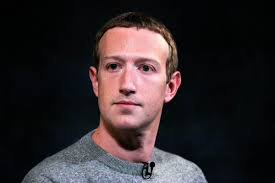

In [69]:
img5

In [86]:

pred_class,pred_idx,outputs = learn.predict(img5)
print(outputs)
print(data.classes)

tensor([0.1889, 0.0110, 0.6016, 0.0103, 0.1881])
['angry', 'happy', 'neutral', 'sad', 'surprise']


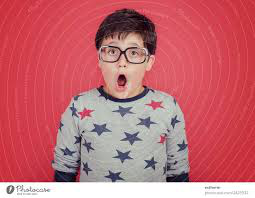

In [71]:
img6

In [87]:

pred_class,pred_idx,outputs = learn.predict(img6)
print(outputs)
print(data.classes)

tensor([    0.0064,     0.0014,     0.0000,     0.0000,     0.9922])
['angry', 'happy', 'neutral', 'sad', 'surprise']
